<a href="https://colab.research.google.com/github/EricNocerino/Mi_Proyecto_Git/blob/main/Proyecto_Final_Nocerino_Eric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consigna

Crearás un notebook que complemente el trabajo realizado en los siguientes apartados:
i) elegir un método de feature selection para reducir la dimensionalidad del dataset,
ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,
 iii) cálculo de métricas básicas para validar el modelo
iv) generar conclusiones con base en los resultados obtenidos.


# Aspectos a incluir

El código debe estar hecho en un notebook y debe estar probado.
Toda la entrega debe estar en su GitHub (notebook y base de datos).
Formato

Entregar un archivo con formato .ipynb. Debe tener el nombre “Proyecto_ParteIII_+Apellido.ipynb”


# Acerca del Conjunto de Datos

Este conjunto de datos contiene diversa información sobre los cursos de Udemy. Incluye datos detallados como el título, el precio, el número de suscriptores, el número de reseñas, el número de lecciones, la duración del contenido y la fecha de publicación de cada curso. También muestra si el curso es de pago, su nivel (principiante, intermedio, experto) y el área temática a la que pertenece (por ejemplo, negocios, desarrollo web, instrumentos musicales, etc.). Este conjunto de datos es un gran recurso para el análisis educativo, las estrategias de precios y el examen del impacto del contenido educativo en la demanda de los usuarios.


# Referencias

**course_id:** Un identificador único para cada curso de Udemy.

**course_title:** El nombre o título del curso de Udemy.

**url**: El enlace directo para acceder al curso de Udemy.

**is_paid**: Indica si el curso es gratuito (Falso) o de pago (Verdadero).

**price:** El precio del curso en dólares, si es de pago.

**num_subscribers:** El número total de estudiantes que se han suscrito al curso.

**num_reviews:** El número de reseñas o calificaciones que el curso ha recibido de los estudiantes.

**num_lectures:** El número total de lecciones o clases incluidas en el curso.

**level:** El nivel de dificultad del curso (por ejemplo, Principiante, Intermedio, Experto).

**content_duration:** La duración total del contenido del curso, típicamente en horas.


**published_timestamp:** La fecha y hora en que el curso fue publicado por primera vez en Udemy.

**subject:** La categoría principal o área temática a la que pertenece el curso (por ejemplo, Negocios, Tecnología).


# Librerías y Dataset

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df_udemy = pd.read_csv('/content/drive/MyDrive/Machine_Learning_I_Nocerino/udemy_courses_dataset.csv')

In [ ]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
df_udemy.shape

(3678, 12)

In [ ]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
df_udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# Analisis del Dataset

Se intentará analizar, segun el tipo de carrera de que quiera seguir el alumno y su nivel base, si debe optar por una clase paga o una gratuita.

El alumno quiere aprender desarrollo web y posee un nivel inicial.

# Normalización del Dataset

**is_paid**


*   0 = false
*   1= true




In [ ]:
df_udemy['is_paid'] = df_udemy['is_paid'].replace({False: 0, True: 1})

**Level**


*   All Levels = 0
*   Beginner Level = 1
*   Intermediate Level = 2
*   Expert Level = 3



In [ ]:
df_udemy['level'] = df_udemy['level'].replace({"All Levels": 0, "Beginner Level": 1, "Intermediate Level":2, "Expert Level":3})

**subject**



*   Graphic Desing = 0
*   Web Development = 1
*   Musical Instruments = 2
*   Business Finance = 3



In [ ]:
df_udemy['subject'] = df_udemy['subject'].replace({"Graphic Design": 0, "Web Development": 1, "Musical Instruments":2, "Business Finance":3})

# Visualizaciones

(-1.099999962803251,
 1.099999914963319,
 -1.0999997520311284,
 1.0999999881919584)

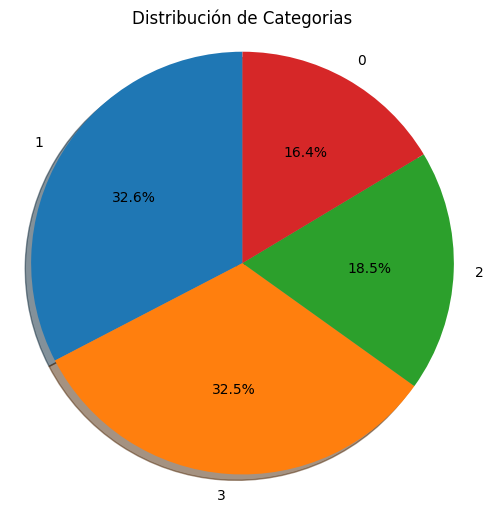

In [ ]:
#Vamos a ver primero la distribución por catedras

cursos_por_catedras = df_udemy['subject'].value_counts()

catedra = cursos_por_catedras.index
cantidad = cursos_por_catedras.values

porcentual = 100.*cantidad/cantidad.sum()

fix, ax= plt.subplots(figsize=(6,6))
ax.pie(porcentual, labels=catedra, autopct='%1.1f%%', shadow=True, startangle=90)
ax.title.set_text('Distribución de Categorias')
ax.axis('equal')

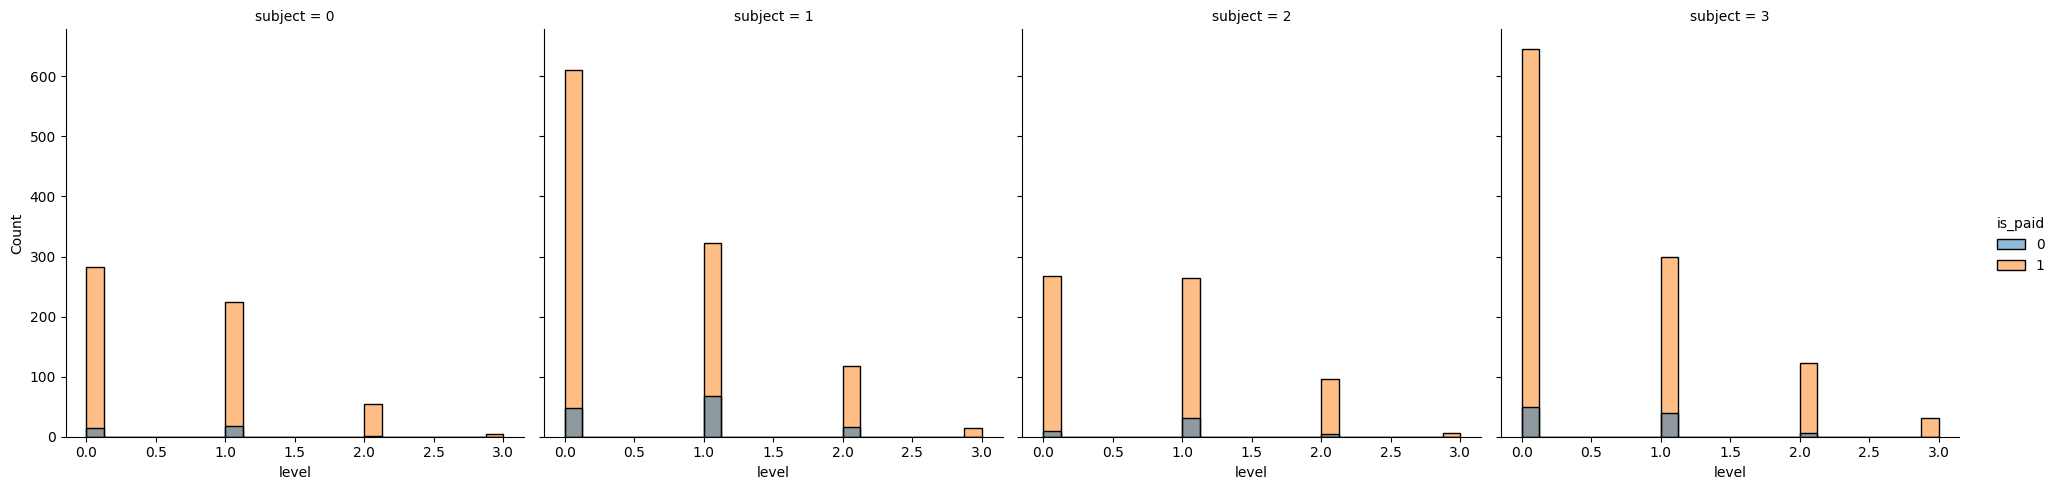

In [ ]:
#Ahora vamos a agrupar por catedra, distribuido por su precio y nivel.

sns.displot(data=df_udemy, x='level', hue='is_paid', col='subject')

<Axes: xlabel='subject', ylabel='num_subscribers'>

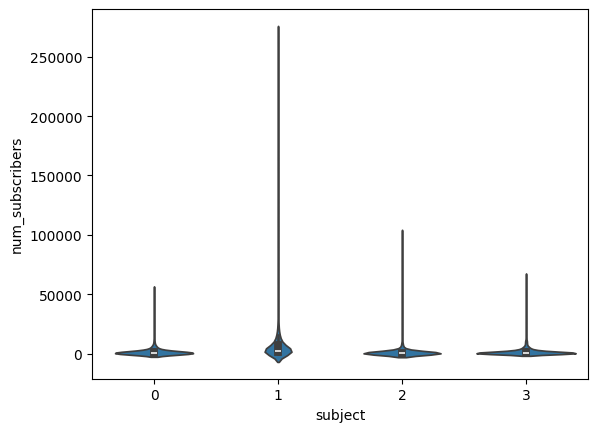

In [ ]:
#Por ultimo, vamos a ver un grafico de "violín" de alumnos por catedra

sns.violinplot(data=df_udemy, x='subject', y='num_subscribers')


# ML

In [ ]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,3
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,3
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,2,2.5,2016-12-19T19:26:30Z,3
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,3
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,2,2.0,2016-12-13T14:57:18Z,3


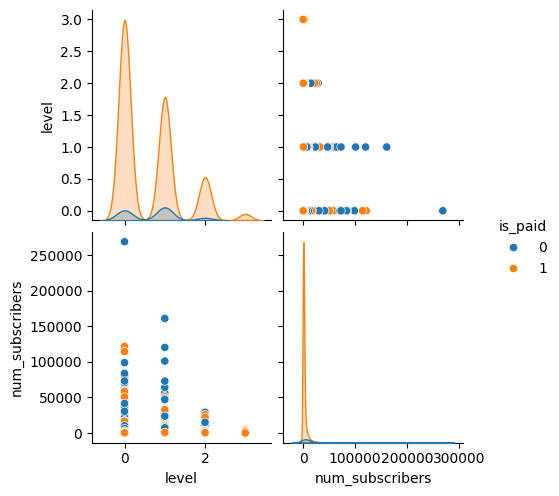

In [ ]:
#Previsualizacion de las variables
sns.pairplot(df_udemy[["level", "is_paid", "num_subscribers"]], hue="is_paid")

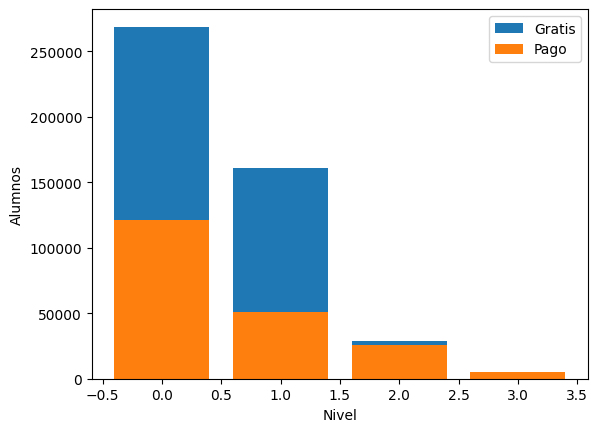

In [ ]:
#filtramos los alumnos que cursan gratis y los que pagan por un curso

gratis=df_udemy[df_udemy["is_paid"]==0]
pago=df_udemy[df_udemy["is_paid"]==1]

plt.bar("level", "num_subscribers", data=gratis, label="Gratis")
plt.bar("level", "num_subscribers", data=pago, label="Pago")
plt.ylabel("Alumnos")
plt.xlabel("Nivel")
plt.legend()
plt.legend()

# Feature Selection

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
#Asignación de variables

A = df_udemy[["subject", "level"]]
B = df_udemy["is_paid"]
A.head()

,subject,level
0,3,0
1,3,0
2,3,2
3,3,0
4,3,2


In [ ]:
B.head()

,is_paid
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, random_state=1)

In [ ]:
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(A_train, B_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(A_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

# Precisión

In [ ]:
precision = accuracy_score(B_test, y_pred)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.8695652173913043


Opción
Probabilidad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

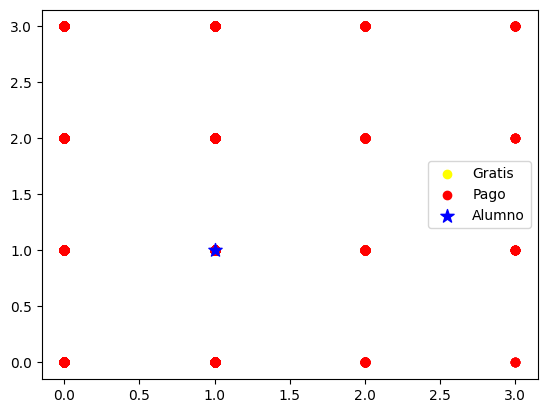

In [ ]:
catedra=1
nivel=1

alumno= scaler.transform([[catedra, nivel]])
print("Opción"), knn.predict(alumno)
print("Probabilidad"), knn.predict_proba(alumno)

plt.scatter(gratis["level"], gratis["subject"], color="yellow", label="Gratis")
plt.scatter(pago["level"], pago["subject"], color="red", label="Pago")
plt.scatter(nivel, catedra, marker="*", s=100, color="blue", label="Alumno")
plt.legend()
plt

# Analisis Final

Teniendo en cuenta que el modelo presenta una precision del 86.95%, se deterrmina que el alumno modelo debería tomar una clase paga en base a la cátedra y el nivel de base que posee.